In [1]:
import torch
import random
import pandas
import numpy
from torch import nn
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'torch'

In [204]:
# model stuff
weight, bias = 0.7, 0.3

# create data 
start = 0
end = 1 
dx = 0.02
X = torch.arange(start, end, dx).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

tsplit=  int(0.8 * len(X))
X_train, y_train = X[:tsplit], y[:tsplit]
X_test, y_test = X[tsplit:], y[tsplit:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


def plot_pred(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, preds = None):
    plt.figure(figsize=(4,4))
    plt.scatter(train_data, train_labels, c="blue", s=4)
    plt.scatter(test_data, test_labels, c="g", s=4)
    if preds is not None:
        plt.scatter(test_data, preds, c="r", s=4)
    plt.show()

torch.Size([40, 1]) torch.Size([40, 1]) torch.Size([10, 1]) torch.Size([10, 1])


In [205]:
# Creating a lin reg model with a lin_reg class 

class LinReg(nn.Module):
    def __init__(self):
        super().__init__() ## TODO: find out what this syntax/function is?
        self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        ## self.weights: Parameter for a neural network, like a parameter in a function
    def forward(self, x:torch.Tensor): ## <-- is supposed to return a torch.tensor type
        return self.weights*x + self.bias ## <-- this is the linear regression model, y = mx + b, where m is self.weights x is a variable, and b is self.bias

In [280]:
# Model building Essentials

torch.manual_seed(42)
model_0 = LinReg()
list(model_0.parameters())

y_pred = model_0(X_test).detach()
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [281]:
## training our first model --> whole idea of training  is for model to move from unknown parameters to some known parameters.
## from a poor representation to a better representation of the data :3
with torch.inference_mode():
    y_preds_new = model_0(X_test)

## loss function
loss_fn  = nn.L1Loss() ## or called mean absolute error loss (MAE)

# optimizer function
para = model_0.parameters()
optimizer_func = torch.optim.ASGD(para, lr=0.01) ## ASGD = Averaged Stochastic Gradient Descent optimizer
## param is a value the model sets itself, learning rate (lr)  is a hyperparameter that we can set
y_pred
y_test


list(model_0.parameters())
y_preds_new

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [282]:
# Training loop and testing loop
epochs = 200 ## <-- number of times we want to train the model
epoch_count = []
loss_value = []
test_loss_value = []

for epoch in range(epochs):
    model_0.train() ## <-- this is a function that sets the model to training mode
        
    # 1. forward pass
    y_preds = model_0(X_train)
    
    # 2. calculate loss
    loss = loss_fn(y_preds, y_train) ## <-- this is the loss function that we defined earlier, setting our prediction variables first and our training variables
    ## this is calculating the difference between our predicted values and our actual/ideal values --> residuals
    
    # 3. optimizer zero grad
    optimizer_func.zero_grad() ## <-- this is a function that sets the gradients to zero
    
    # 4. performing backprop on the loss w/respect to the parameters of the model
    loss.backward() ## <-- this is a function that calculates the gradients of the loss w/respect to the parameters of the model
    
    # 5. optimizer (perform gradient descent)
    optimizer_func.step() ## <-- this is a function that updates the parameters of the model
    
    model_0.eval() ## <-- this is a function that sets the model to evaluation mode
    
    ## testing our model
    
    with torch.inference_mode():
        tp_pred = model_0(X_test)
        tp_loss = loss_fn(tp_pred, y_test)
    if epoch %10 == 0:
        epoch_count.append(epoch)
        loss_value.append(loss)
        test_loss_value.append(tp_loss)
        print(f"Epoch: {epoch}, Training Loss: {loss.item()}, Testing Loss: {tp_loss.item()}")
        

print(model_0.state_dict())


Epoch: 0, Training Loss: 0.31288138031959534, Testing Loss: 0.481065571308136
Epoch: 10, Training Loss: 0.19767488539218903, Testing Loss: 0.3463612496852875
Epoch: 20, Training Loss: 0.08909468352794647, Testing Loss: 0.21731042861938477
Epoch: 30, Training Loss: 0.05315480753779411, Testing Loss: 0.1446629762649536
Epoch: 40, Training Loss: 0.045441605150699615, Testing Loss: 0.11364114284515381
Epoch: 50, Training Loss: 0.04168197140097618, Testing Loss: 0.09923985600471497
Epoch: 60, Training Loss: 0.03819282725453377, Testing Loss: 0.0882287546992302
Epoch: 70, Training Loss: 0.03476398438215256, Testing Loss: 0.08065230399370193
Epoch: 80, Training Loss: 0.03132996708154678, Testing Loss: 0.07238899916410446
Epoch: 90, Training Loss: 0.02789219096302986, Testing Loss: 0.06412558257579803
Epoch: 100, Training Loss: 0.024464309215545654, Testing Loss: 0.05654941126704216
Epoch: 110, Training Loss: 0.021029645577073097, Testing Loss: 0.04828645661473274
Epoch: 120, Training Loss: 0.

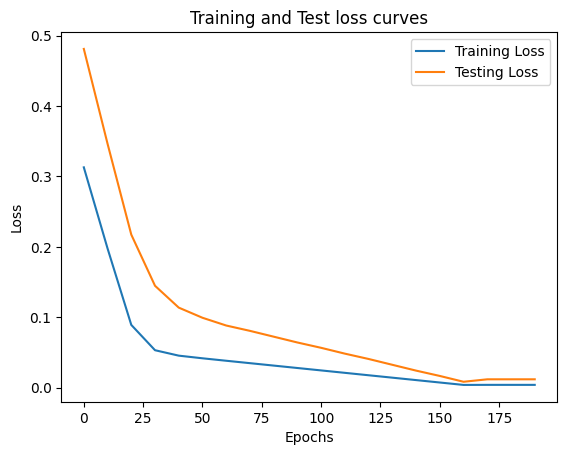

In [300]:
import numpy as np
loss_value, test_loss_value = np.array(torch.tensor(loss_value).cpu().numpy()), np.array(torch.tensor(test_loss_value).cpu().numpy())
loss_value, test_loss_value
plt.plot(epoch_count, loss_value, label="Training Loss")
plt.plot(epoch_count, test_loss_value, label="Testing Loss")
plt.title("Training and Test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();